In [16]:
import altair as alt

In [12]:
import pandas as pd
import requests
import numpy as np

In [45]:
 
df = pd.read_csv('India Agriculture Crop Production.csv')


After discussing the other datasets with you during office hours, I realized that I should try to find data from more legitimate sources. Unfortunately, I was unsuccessful in reaching the US Foreign Agricultural Service for data. However, I found a great Indian government data website where I was able to find a great dataset which was similar to what I found on Kaggle. 

This dataset is available here: https://aps.dac.gov.in/APY/Public_Report1.aspx

I had to go on the Ministry of Agriculture and Farmers Welfare website and in particular, here: https://aps.dac.gov.in/Home.aspx?ReturnUrl=%2f where I chose APY. This led me to this page -https://aps.dac.gov.in/APY/Index.htm where I chose District wise crop production statistics. And then I could generate my report from these selections - https://aps.dac.gov.in/APY/Public_Report1.aspx . I chose to check all the boxes in every field. 

It was downloaded as an Excel file. 



In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344208 entries, 0 to 344207
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        344208 non-null  int64  
 1   State             344208 non-null  object 
 2   District          344208 non-null  object 
 3   Crop              344099 non-null  object 
 4   Year              344208 non-null  object 
 5   Season            344208 non-null  object 
 6   Area              344099 non-null  float64
 7   Area Units        344208 non-null  object 
 8   Production        339187 non-null  float64
 9   Production Units  344208 non-null  object 
 10  Yield             344099 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 28.9+ MB


In [49]:
del df['Unnamed: 0']

In [50]:
df.head(50)

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.00,Hectare,2.061000e+03,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.00,Hectare,2.083000e+03,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.00,Hectare,1.525000e+03,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.00,Hectare,5.239000e+03,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.00,Hectare,5.267000e+03,Tonnes,1.696296
5,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2003-04,Whole Year,3118.00,Hectare,5.182000e+03,Tonnes,1.661963
6,Andaman and Nicobar Islands,NICOBARS,Banana,2002-03,Whole Year,213.00,Hectare,1.278000e+03,Tonnes,6.000000
7,Andaman and Nicobar Islands,NICOBARS,Banana,2003-04,Whole Year,266.00,Hectare,1.763000e+03,Tonnes,6.627820
8,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2002-03,Whole Year,1524.00,Hectare,1.088200e+04,Tonnes,7.140420
9,Andaman and Nicobar Islands,SOUTH ANDAMANS,Banana,2003-04,Whole Year,1530.00,Hectare,1.155800e+04,Tonnes,7.554248


This dataset has detailed information on the various districts in each state and union territory, and the crop production for various seasons. Rabi is the winter season, and kharif is the summer season. Rabi crops are sown in the winter around November, and harvested in the spring. Kharif crops are sown in the summer around May and harvested in autumn in around October/November. For my purposes, I will choose to stick to these two seasons as they are the main cropping seasons. 

Since I am interested in how the crop production of various yields has progressed over time, I will choose specific states-districts for my analysis. This is because in India certain areas are more vulnerable to climatic stresses or unpredictable weather than other places. I am still doing my research on which areas are more prone to such changes. But, I will use this dataset to see if there are some irregular patterns in certain crops/fruits too. It will be a repetitive process of selecting various kinds of datasets and creating line charts to see the trends over the decades from 1997-2020.

In [17]:
df.Crop.unique()

array(['Arecanut', 'Banana', 'Black pepper', 'Cashewnut', 'Coconut',
       'Dry chillies', 'Ginger', 'Other Kharif pulses', 'other oilseeds',
       'Rice', 'Sugarcane', 'Sweet potato', 'Arhar/Tur', 'Bajra',
       'Castor seed', 'Coriander', 'Cotton(lint)', 'Gram', 'Groundnut',
       'Horse-gram', 'Jowar', 'Linseed', 'Maize', 'Mesta',
       'Moong(Green Gram)', 'Niger seed', 'Onion', 'Other Rabi pulses',
       'Potato', 'Ragi', 'Rapeseed &Mustard', 'Safflower', 'Sesamum',
       'Small millets', 'Soyabean', 'Sunflower', 'Tapioca', 'Tobacco',
       'Turmeric', 'Urad', 'Wheat', 'Oilseeds total', 'Jute', 'Masoor',
       'Peas & beans (Pulses)', 'Barley', 'Garlic', 'Khesari', 'Sannhamp',
       'Guar seed', 'Moth', 'Cardamom', 'Other Cereals', 'Cowpea(Lobia)',
       'Dry Ginger', 'Other Summer Pulses', nan], dtype=object)

Right now, I am exploring the dataset so that I can see which crops, states, districts, etc, are in it. Above, is a list of the crops whose production values across different states is being calculated. 

India has various cropping seasons, and I wish to know which ones this dataset incorporates. 

In [18]:
df.Season.unique() 

array(['Kharif', 'Whole Year', 'Rabi', 'Autumn', 'Summer', 'Winter'],
      dtype=object)

Here I am seeing six seasons, and I know that many of them overlap with each other. Kharif season runs from May-September/October, and the Rabi season begins from November to April/May. These two seasons tend to incorporate the Summer and Winter seasons. I will use these two seasons for my analysis. 

When it comes to the states, I would need to know which ones since I want to explore this dataset state-wise, and not crop-wise, for more precise patterns. 


In [19]:
df.State.unique() 

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'Telangana'], dtype=object)

Each state has its districts, which are usually but not always, predominated by one or two crop types. For example, West Bengal is known for being a major cultivator of rice. However, rice is grown all over India also, such as in the states of Punjab, and others.  

In my exploration of this dataset (which I discussed with you during office hours) I had already found a few crops showing an alarming rate of decline, and I was later able to find news sources to help me figure out why this might be the case. Production of some crops have increased, though, and these variations are very crop and region specific. I will explore an interesting case of Punjab, and for this, I will subset data from the state, particularly its rice production. 

## Production for all states, all crops, by year

In [56]:
production_all = df.groupby(['State', 'Crop', 'Year', 'Season']).sum()[['Production']].reset_index()
production_all

,State,Crop,Year,Season,Production
0,Andaman and Nicobar Islands,Arecanut,2000-01,Kharif,7200.00
1,Andaman and Nicobar Islands,Arecanut,2001-02,Kharif,7300.00
2,Andaman and Nicobar Islands,Arecanut,2002-03,Whole Year,7350.00
3,Andaman and Nicobar Islands,Arecanut,2003-04,Whole Year,6707.00
4,Andaman and Nicobar Islands,Arecanut,2004-05,Whole Year,4781.05
...,...,...,...,...,...
21383,West Bengal,Wheat,2015-16,Rabi,788503.00
21384,West Bengal,Wheat,2016-17,Rabi,862712.00
21385,West Bengal,Wheat,2017-18,Rabi,362744.00
21386,West Bengal,Wheat,2018-19,Rabi,337751.00


In [61]:
# subset for Punjab and Rice
production_all[
    (production_all['State'] == 'Punjab') &
    (production_all['Crop'] == 'Rice') 
].reset_index()

,index,State,Crop,Year,Season,Production
0,15849,Punjab,Rice,1997-98,Kharif,7904000.0
1,15850,Punjab,Rice,1998-99,Kharif,7940000.0
2,15851,Punjab,Rice,1999-00,Kharif,8716000.0
3,15852,Punjab,Rice,2000-01,Kharif,9154000.0
4,15853,Punjab,Rice,2001-02,Kharif,8816000.0
5,15854,Punjab,Rice,2002-03,Kharif,8880000.0
6,15855,Punjab,Rice,2003-04,Kharif,9656000.0
7,15856,Punjab,Rice,2004-05,Kharif,10437000.0
8,15857,Punjab,Rice,2005-06,Kharif,10193000.0
9,15858,Punjab,Rice,2006-07,Kharif,10138000.0


## Rice production in Punjab

HYPOTHESIS: One interesting case study of sorts is Punjab, where rice yeilds have declined over time, due to various reasons. As per the Indian Express [in this article](https://drive.google.com/file/d/1WW44UyHMZjKfRrE0lnKlMPbwW_CWhI3-/view?usp=share_link), Punjab's ground-water level has been declining sharply ever since rice cultivation was introduced into the state. Rice is a water-intensive crop. The government there is pushing the farmers to diversify the crops growns to reduce rice cultivation to help with this issue. This could be a good reason why over time rice cultivation in the area is declining. This policy is also a few years old only. 

In [51]:
df_pj_rice =  df[(df['State'] == 'Punjab') & (df['Crop'] == 'Rice')].reset_index(drop=True)
df_pj_rice

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Punjab,AMRITSAR,Rice,2001-02,Kharif,319000.0,Hectare,958000.0,Tonnes,3.003135
1,Punjab,AMRITSAR,Rice,2002-03,Kharif,311000.0,Hectare,879000.0,Tonnes,2.826367
2,Punjab,AMRITSAR,Rice,2003-04,Kharif,326000.0,Hectare,872000.0,Tonnes,2.674847
3,Punjab,BATHINDA,Rice,2001-02,Kharif,82000.0,Hectare,307000.0,Tonnes,3.743902
4,Punjab,BATHINDA,Rice,2002-03,Kharif,107000.0,Hectare,367000.0,Tonnes,3.429907
...,...,...,...,...,...,...,...,...,...,...
443,Punjab,RUPNAGAR,Rice,2000-01,Kharif,49000.0,Hectare,163000.0,Tonnes,3.326531
444,Punjab,SANGRUR,Rice,1997-98,Kharif,333000.0,Hectare,1277000.0,Tonnes,3.834835
445,Punjab,SANGRUR,Rice,1998-99,Kharif,353000.0,Hectare,1262000.0,Tonnes,3.575071
446,Punjab,SANGRUR,Rice,1999-00,Kharif,360000.0,Hectare,1282000.0,Tonnes,3.561111


In [54]:
pj_rice_prod = df_pj_rice.groupby(['Year']).sum()[['Production']].reset_index()
pj_rice_prod

,Year,Production
0,1997-98,7904000.0
1,1998-99,7940000.0
2,1999-00,8716000.0
3,2000-01,9154000.0
4,2001-02,8816000.0
5,2002-03,8880000.0
6,2003-04,9656000.0
7,2004-05,10437000.0
8,2005-06,10193000.0
9,2006-07,10138000.0


In [69]:
source =  pj_rice_prod

bars = alt.Chart(source).mark_bar().encode(
    x='Production:Q',
    y="Year:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='wheat:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [70]:

alt.Chart(pj_rice_prod).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Punjab from 1997-2020')

alt.Chart(...)

In [20]:
df_pj_rice  = df.loc[(df['State'] == 'Punjab') & (df['Crop'] == 'Rice')] ## I am subsetting the data and only keeping that related to rice production.
df_pj_rice.head(20)

,Unnamed: 0,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
29303,29303,Punjab,AMRITSAR,Rice,2001-02,Kharif,319000.0,Hectare,958000.0,Tonnes,3.003135
29304,29304,Punjab,AMRITSAR,Rice,2002-03,Kharif,311000.0,Hectare,879000.0,Tonnes,2.826367
29305,29305,Punjab,AMRITSAR,Rice,2003-04,Kharif,326000.0,Hectare,872000.0,Tonnes,2.674847
29306,29306,Punjab,BATHINDA,Rice,2001-02,Kharif,82000.0,Hectare,307000.0,Tonnes,3.743902
29307,29307,Punjab,BATHINDA,Rice,2002-03,Kharif,107000.0,Hectare,367000.0,Tonnes,3.429907
29308,29308,Punjab,BATHINDA,Rice,2003-04,Kharif,105000.0,Hectare,419000.0,Tonnes,3.990476
29309,29309,Punjab,FARIDKOT,Rice,2001-02,Kharif,70000.0,Hectare,267000.0,Tonnes,3.814286
29310,29310,Punjab,FARIDKOT,Rice,2002-03,Kharif,86000.0,Hectare,280000.0,Tonnes,3.255814
29311,29311,Punjab,FARIDKOT,Rice,2003-04,Kharif,84000.0,Hectare,308000.0,Tonnes,3.666667
29312,29312,Punjab,FATEHGARH SAHIB,Rice,2001-02,Kharif,81000.0,Hectare,324000.0,Tonnes,4.000000


In [21]:
df_pj_rice.District.unique() ## To find the various districts where rice is grown in Punjab. I am going to keep this aside separately for later use. 

array(['AMRITSAR', 'BATHINDA', 'FARIDKOT', 'FATEHGARH SAHIB', 'FIROZEPUR',
       'GURDASPUR', 'HOSHIARPUR', 'JALANDHAR', 'KAPURTHALA', 'LUDHIANA',
       'MANSA', 'MOGA', 'MUKTSAR', 'NAWANSHAHR', 'PATIALA', 'RUPNAGAR',
       'SANGRUR', 'S', 'TARN TARAN', 'BARNALA', 'FAZILKA', 'PATHANKOT'],
      dtype=object)

I will try to find the way rice production has progressed over time, but as you can see below, this was a flawed way of doing it as the data is spread out across districts, and there is no cumulative data of rice production in every kharif year for the state. 

In [22]:
alt.Chart(df_pj_rice).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice yields in Punjab from 1997-2020')

alt.Chart(...)

There is no compiled state-wide date for a particular year and the data shows distribution over districts. This is not the correct graph. I will need to either see the data across its various districts, or add up the total rice yeilds ever kharif year. 

## Across districts of Punjab

Punjab has 22 districts, of which 21 are represented here clearly. 

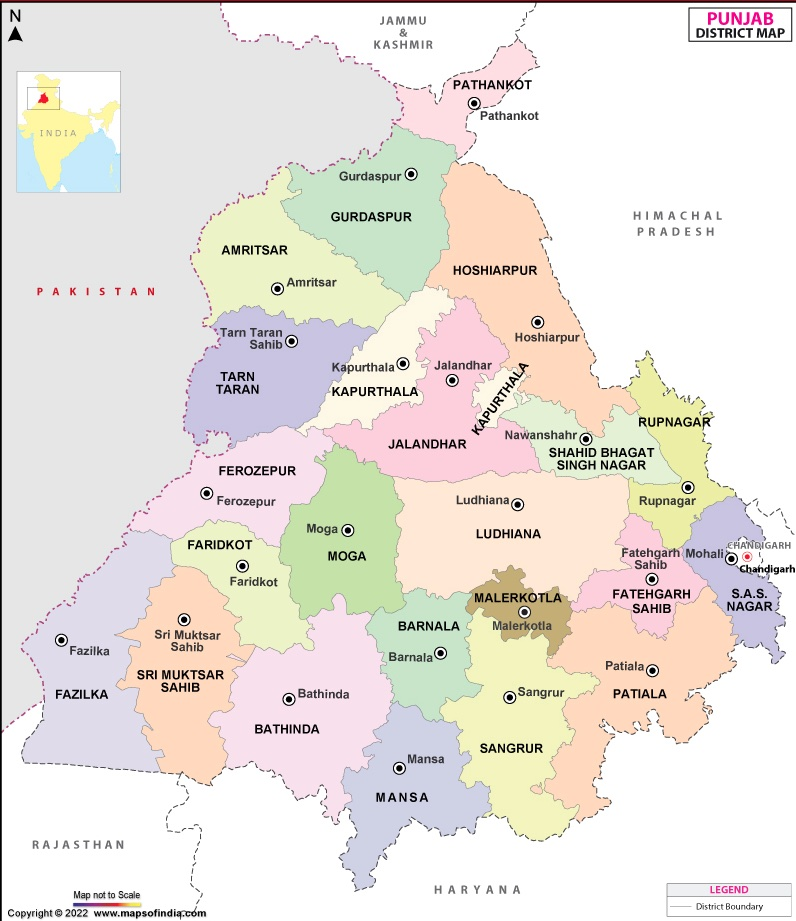

### Firozpur

In [23]:
df_pj_fi = df_pj_rice.loc[df['District'] == 'FIROZEPUR']

alt.Chart(df_pj_fi).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Firozpur, Punjab from 1997-2020')

alt.Chart(...)

There really has been a considerable decline of rice production in this district. This may be true for other districts also. 

### Amritsar

In [24]:
df_pj_am = df_pj_rice.loc[df['District'] == 'AMRITSAR']

alt.Chart(df_pj_am).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Amritsar, Punjab from 1997-2020')

alt.Chart(...)

### JALANDHAR

A marked decline here as well. 

In [25]:
df_pj_ja = df_pj_rice.loc[df['District'] == 'JALANDHAR']

alt.Chart(df_pj_ja).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Jalandhar, Punjab from 1997-2020')

alt.Chart(...)

### SANGRUR

In [26]:
df_pj_sa = df_pj_rice.loc[df['District'] == 'SANGRUR']

alt.Chart(df_pj_sa).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Sangrur, Punjab from 1997-2020')

alt.Chart(...)

### FARIDKOT

In [27]:
df_pj_far = df_pj_rice.loc[df['District'] == 'FARIDKOT']

alt.Chart(df_pj_far).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, Faridkot, Punjab from 1997-2020')

alt.Chart(...)

### LUDHIANA

In [28]:
df_pj_lud = df_pj_rice.loc[df['District'] == 'LUDHIANA']

alt.Chart(df_pj_lud).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production in tonnes, Ludhiana, Punjab from 1997-2020')

alt.Chart(...)

The district of Ludhiana does not fall in this trend as dramatically as the other districts. Yet, the production has fluctuated over time. 

### BATHINDA

In [29]:
df_pj_bat = df_pj_rice.loc[df['District'] == 'BATHINDA']

alt.Chart(df_pj_bat).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Bathinda, Punjab from 1997-2020')

alt.Chart(...)

Bathinda seems similar to Ludhiana. 

### FATEHGARH SAHIB

In [30]:
df_pj_fs = df_pj_rice.loc[df['District'] == 'FATEHGARH SAHIB']

alt.Chart(df_pj_fs).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Fatehgarh Sahib, Punjab from 1997-2020')

alt.Chart(...)

### HOSHIARPUR

In [31]:
df_pj_hos = df_pj_rice.loc[df['District'] == 'HOSHIARPUR']

alt.Chart(df_pj_hos).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Hoshiarpur, Punjab from 1997-2020')

alt.Chart(...)

### KAPURTHALA

In [32]:
df_pj_kap = df_pj_rice.loc[df['District'] == 'KAPURTHALA']

alt.Chart(df_pj_kap).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Kapurthala, Punjab from 1997-2020')

alt.Chart(...)

### MOGA

In [33]:
df_pj_mog = df_pj_rice.loc[df['District'] == 'MOGA']

alt.Chart(df_pj_mog).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Moga, Punjab from 1997-2020')

alt.Chart(...)

### MUKTSAR

In [34]:
df_pj_muk = df_pj_rice.loc[df['District'] == 'MUKTSAR']

alt.Chart(df_pj_muk).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Muktsar, Punjab from 1997-2020')

alt.Chart(...)

### NAWANSHAHR

In [35]:
df_pj_naw = df_pj_rice.loc[df['District'] == 'NAWANSHAHR']

alt.Chart(df_pj_naw).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Nawanshahr, Punjab from 1997-2020')

alt.Chart(...)

### RUPNAGAR

In [36]:
df_pj_rup = df_pj_rice.loc[df['District'] == 'RUPNAGAR']

alt.Chart(df_pj_rup).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Rupnagar, Punjab from 1997-2020')

alt.Chart(...)

### GURDASPUR

In [37]:
df_pj_gur = df_pj_rice.loc[df['District'] == 'GURDASPUR']

alt.Chart(df_pj_gur).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Gurdaspur, Punjab from 1997-2020')

alt.Chart(...)

### TARN TARAN

In [38]:
df_pj_tt = df_pj_rice.loc[df['District'] == 'TARN TARAN']

alt.Chart(df_pj_tt).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Tarn Taran, Punjab from 1997-2020')

alt.Chart(...)

### BARNALA

In [39]:
df_pj_bar = df_pj_rice.loc[df['District'] == 'BARNALA']

alt.Chart(df_pj_bar).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Barnala, Punjab from 1997-2020')

alt.Chart(...)

### FAZILKA

In [40]:
df_pj_faz = df_pj_rice.loc[df['District'] == 'FAZILKA']

alt.Chart(df_pj_faz).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Fazilka, Punjab from 1997-2020')

alt.Chart(...)

### PATHANKOT 

In [41]:
df_pj_pat = df_pj_rice.loc[df['District'] == 'PATHANKOT']

alt.Chart(df_pj_pat).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in Pathankot, Punjab from 1997-2020')

alt.Chart(...)

### S

It is not known which district this represents. It is only stated as 'S'. Here are a [list of districts in Punjab](https://nriol.com/india-statistics/punjab/districts.asp). It seems like this 'S' can be either Sahibzada Ajit Singh Nagar, or Mansa. Since it begins with an 'S', I am guessing it is the former, but for now, let us leave it at S. Except for one district, every other district of Punjab has been represented by this data.  

In [42]:
df_pj_s = df_pj_rice.loc[df['District'] == 'S']

alt.Chart(df_pj_s).mark_line().encode(
    x='Year',
    y=('Production')
).properties(
    title='Rice production, in tonnes, in S, Punjab from 1997-2020')

alt.Chart(...)

Except for the districts of Fazilka, Hoshiarpur and Bathinda, the other districts of Punjab are showing moderate to steep decline in rice production over the past 5-10 years, especially. This seems to correspond with the earlier hypothesis of the diversification of the crops in Punjab. 